In [10]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import csv
import json
import gmaps
import requests
from datetime import datetime
#from config import gkey
import gmaps
#from us import states
#import censusgeocode

cleancities = "../Project1/cleaned_cities_states.csv"

In [11]:
#gmaps.configure(api_key=gkey)

In [12]:
url = "https://jobs.github.com/positions.json?"
page = "page="
page_num = "0"
df_1 = []
df_2 = []
l = []
time = str(datetime.now())

In [13]:
csv = pd.read_csv('uscities_clean.csv')
c_df = pd.DataFrame(csv)

In [14]:
i = 1

while i < 20:
    
    f = (url + page + str(i))
    res = requests.get(f)
    res_json = res.json()
    res_vol = len(res_json)
    
    if (res_vol > 3):
        l = l + res_json
        print(f"Completed API call number {i}")
    else:
        print(f"res was smaller than 3 so we are going to stop the loop and print.")
        print(f"final length of response {len(l)}")
        break
    i += 1

#print(type(l))

Completed API call number 1
Completed API call number 2
Completed API call number 3
Completed API call number 4
Completed API call number 5
Completed API call number 6
Completed API call number 7
res was smaller than 3 so we are going to stop the loop and print.
final length of response 304


In [18]:
l['location'] = l['location'].replace(
    {'New York, NY': 'New York, New York', 'New York': 'New York, New York', 
     'New York City': 'New York, New York', 'Frankfurt':'Frankfurt, Germany', 
     'Hamburg':'Hamburg, Germany','Barcelona':'Barcelona, Spain', 'Berlin':'Berlin, Germany', 
     'San Francisco': 'San Francisco, CA', 'London':'London, UK', 'Toronto':'Toronto, Canada', 
     'Chicago':'Chicago, IL', 'Den Haag':'Den Haag, Netherlands', 'Austin, Texas':'Austin, TX', 'München':'Munich, Berlin', 
     'Amsterdam':'Amsterdam, Netherlands', 'Eindhoven':'Eindhoven, Netherlands', 'Bremen':'Bremen, Germany', 
     'Munich':'Munich, Germany','Utrecht':'Utrecht, Netherlands','Oberkochen':'Oberkochen, Germany','Stuttgart':'Stuttgart, Germany',
    'Frankfurt  (Main)':'Frankfurt, Germany', 'Warsaw':'Warsaw, Poland', 'Lisbon':'Lisbon, Portugal', 'Nürnberg':'Nürnberg, Germany',
     'New York, New York 10001':'New York, NY', '81829 Munich':'Munich, Germany', 'Barendrecht': 'Barendrecht, Netherlands', 'Fort Collins':'Fort Collins, CO',
     'Buffalo':'Buffalo, NY', 'Los Angeles, CA, USA':'Los Angeles, CA','Portland, Maine':'Portland, ME','Philadelphia':'Philadelphia, PA',
     'Paris France':'Paris, France', 'Hamburg, Deutschland':'Hamburg, Germany', 'Rotterdam':'Rotterdam, Netherlands','Chicago, Illinois':'Chicago, IL', 
     'Budapest':'Budapest, Hungary', 'Bucharest':'Bucharest, Romania', 'San Francisco ':'San Francisco, CA','Remote Job':'Remote', 'Athens':'Athens, Greece',
     'Den Bosch':'Den Bosch, Netherlands','Remote - US':'Remote','Nijverdal':'Nijverdal, Netherlands', 'San Diego':'San Diego, CA','Mill Valley':'Mill Valley, CA',
     'Gothenburg':'Gothenburg, Sweden', 'Gothenburg ':'Gothenburg, Sweden','Redwood City, Ca':'Redwood City, CA', 'Oslo, Norway or Remote':'Remote','Lincoln, NE or Remote':'Remote','Helsinki/Remote':'Remote',
     'Paris - Remote (European Timezone)':'Remote','Miami, Fl or Remote':'Remote','Columbus, Ohio':'Columbus, OH', 'Oberkochen, Germany':'Oberkochen, Germany', 'Palo Alto':'Palo Alto, CA',
     'Cologne - Germany':'Cologne, Germany', 'Phoenix, Atlanta, Remote-US Based':'Remote'
    }) 

In [19]:
clean_location = pd.read_csv(cleancities)
l2 = pd.merge(l, clean_location, on='id')
l2.drop(['company_logo', 'company_url', 'how_to_apply', 'location_x', 'url', 'location_y'], axis=1)
df2 = pd.DataFrame(l2)
l2

,id,type,url,created_at,company,company_url,location_x,title,description,how_to_apply,company_logo,location_y,Remote,City,County,State,Country
0,b3704276-7ed7-4880-8d45-f35052964659,Full Time,https://jobs.github.com/positions/b3704276-7ed...,Mon Oct 21 21:12:11 UTC 2019,Datadog,http:,NewYork,Software Engineer- Frontend,<p>Have you been writing beautiful web UIs for...,"<p><a href=""https://grnh.se/f0a956961"">https:/...",https://jobs.github.com/rails/active_storage/b...,"New York, New York, United States",NaN,New York,New York,NY,United States
1,a71fdb23-3447-4b5f-8fca-db08a774e48b,Full Time,https://jobs.github.com/positions/a71fdb23-344...,Mon Oct 21 18:28:48 UTC 2019,Abt Associates,https://www.abtassociates.com/,"Cambridge, MA",Senior Application Developer,<p><strong>Opportunity</strong></p>\n<p>Abt As...,"<p>Apply online here:\n<a href=""https://career...",https://jobs.github.com/rails/active_storage/b...,"Cambridge, MA, United States",NaN,Cambridge,Middlesex,MA,United States
2,df2d1d3f-4408-45ca-b586-3f07eb24e0e6,Full Time,https://jobs.github.com/positions/df2d1d3f-440...,Mon Oct 21 18:25:41 UTC 2019,Sertifi,https://corp.sertifi.com/,"Chicago, IL",Senior Software Developer,<p>Sertifi offers an Agreement Platform built ...,"<p><a href=""https://sertifi.applytojob.com/app...",None,"Chicago, IL, United States",NaN,Chicago,Cook,IL,United States
3,9dde244a-f5b9-458d-b99b-7cfa19cfa798,Full Time,https://jobs.github.com/positions/9dde244a-f5b...,Mon Oct 21 14:31:18 UTC 2019,wrnch,https://wrnch.ai/,Montreal,Senior Software Developer,<p>wrnch is one of Canada’s first profitable A...,<p>Please apply via our website -&gt; <a href=...,https://jobs.github.com/rails/active_storage/b...,"Montreal, , Canada",NaN,Montreal,NaN,NaN,Canada
4,36b9af5b-fcc0-457d-b7f3-efc61625bbdb,Full Time,https://jobs.github.com/positions/36b9af5b-fcc...,Mon Oct 21 12:46:24 UTC 2019,Shell,http://www.shell.com,"London, UK",Scrum Master - Agile Hub,<p><strong>Job Description</strong></p>\n<p><s...,"<p><a href=""https://shellinternational.redirec...",https://jobs.github.com/rails/active_storage/b...,"London, , United Kingdom",NaN,London,NaN,NaN,United Kingdom
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,40ca8a98-a4bb-11e8-9a40-f75b414612e1,Full Time,https://jobs.github.com/positions/40ca8a98-a4b...,Mon Oct 22 16:33:37 UTC 2018,Reaktor,http://reaktor.com,"New York, New York",A Challenge for Developers: Solve the Tracking...,<p><strong>Reaktor is looking for developers w...,"<p>Play the <a href=""https://tracking-game.rea...",https://jobs.github.com/rails/active_storage/b...,"New York, New York",NaN,New York,New York,NY,United States
282,df5b47be-d612-11e8-88f4-50633736745c,Full Time,https://jobs.github.com/positions/df5b47be-d61...,Mon Oct 22 15:56:13 UTC 2018,Constructive,http://www.constructive.co,"New York, New York","Technology Team Lead, Design Agency for Social...","<p>Constructive (<a href=""https://constructive...",<p><strong>Interested? Great! Then please send...,https://jobs.github.com/rails/active_storage/b...,"New York, New York",NaN,New York,New York,NY,United States
283,da8ad94e-d5f8-11e8-8225-f199d46197fd,Full Time,https://jobs.github.com/positions/da8ad94e-d5f...,Mon Oct 22 12:49:21 UTC 2018,www.FaktorZehn.com,http://www.FaktorZehn.com,"Munich, Berlin",Senior Software Entwickler Java (m/w/d),<p>Lust auf Veränderung?</p>\n<p>Du bist ein J...,<p>Klicken Sie hier um zum Bewerbungsformular ...,https://jobs.github.com/rails/active_storage/b...,"Munich, Berlin",NaN,Munich,NaN,NaN,Germany
284,95048694-1952-11e8-86d5-38e7f24d7ed9,Full Time,https://jobs.github.com/positions/95048694-195...,Sun Oct 21 23:46:24 UTC 2018,Analytics Fire,http://analyticsfire.com,Remote,SENIOR FULL-STACK DEV WITH RUBY/PYTHON/REACT -...,<p><strong>Job Description</strong></p>\n<p>An...,<p>Please email your resume and cover letter t...,https://jobs.github.com/rails/active_storage/b...,Remote,Remote,NaN,NaN,NaN,NaN


In [20]:
new = l["location"].str.split(",", n = 1, expand = True)
l["city"]=new[0]
l["state_code_or_country"]=new[1]
l

,id,type,url,created_at,company,company_url,location,title,description,how_to_apply,company_logo,city,state_code_or_country
0,a96b9c4d-5fca-4ecc-83f2-88d7558a4162,Full Time,https://jobs.github.com/positions/a96b9c4d-5fc...,Wed Oct 23 16:36:13 UTC 2019,YouVersion,http://youversion.com/careers,"Edmond, OK",YouVersion Full-Stack Software Engineer,<p>The Full-Stack Software Engineer will be re...,"<p>Ready to apply?\nVisit <a href=""http://bit....",https://jobs.github.com/rails/active_storage/b...,Edmond,OK
1,b7d3856c-3ec3-4566-90a4-19ec369a9f7b,Full Time,https://jobs.github.com/positions/b7d3856c-3ec...,Wed Oct 23 15:10:00 UTC 2019,hte – the high throughput experimentation company,http://www.hte-company.com,Heidelberg,Senior Softwareentwickler .NET/C# (m/w/d) im B...,<p>Zur Verstärkung unseres Teams suchen wir ei...,"<p><a href=""https://htekarriere.redirect.your-...",https://jobs.github.com/rails/active_storage/b...,Heidelberg,None
2,0276f45a-0355-4d81-84b8-fe498cc5377f,Full Time,https://jobs.github.com/positions/0276f45a-035...,Wed Oct 23 14:59:13 UTC 2019,Reaktor,https://reaktor.com/careers/,"Lisbon, Portugal",Fearless Team Builder and Software Developer,<p>We at Reaktor are known for changing how th...,"<p>So, <a href=""https://www.reaktor.com/blog/a...",https://jobs.github.com/rails/active_storage/b...,Lisbon,Portugal
3,dbc59368-523c-455c-ab85-8f4e634e5dc1,Full Time,https://jobs.github.com/positions/dbc59368-523...,Wed Oct 23 14:49:07 UTC 2019,Reaktor,https://reaktor.com/careers/,"Lisbon, Portugal",Software Engineer With a Twist,<p>Curious about applying your tech skills in ...,"<p>So, <a href=""https://www.reaktor.com/blog/a...",https://jobs.github.com/rails/active_storage/b...,Lisbon,Portugal
4,343a5271-90fb-44fa-badc-8f1eca1ba30f,Full Time,https://jobs.github.com/positions/343a5271-90f...,Wed Oct 23 14:37:43 UTC 2019,INFICON,http:,"East Syracuse, NY",Senior Software Engineer,"<p>COMPANY OVERVIEW:\nINFICON is a growing, gl...","<p>Apply Here: <a href=""http://www.Click2Apply...",None,East Syracuse,NY
...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,40ca8a98-a4bb-11e8-9a40-f75b414612e1,Full Time,https://jobs.github.com/positions/40ca8a98-a4b...,Mon Oct 22 16:33:37 UTC 2018,Reaktor,http://reaktor.com,"New York, New York",A Challenge for Developers: Solve the Tracking...,<p><strong>Reaktor is looking for developers w...,"<p>Play the <a href=""https://tracking-game.rea...",https://jobs.github.com/rails/active_storage/b...,New York,New York
300,df5b47be-d612-11e8-88f4-50633736745c,Full Time,https://jobs.github.com/positions/df5b47be-d61...,Mon Oct 22 15:56:13 UTC 2018,Constructive,http://www.constructive.co,"New York, New York","Technology Team Lead, Design Agency for Social...","<p>Constructive (<a href=""https://constructive...",<p><strong>Interested? Great! Then please send...,https://jobs.github.com/rails/active_storage/b...,New York,New York
301,da8ad94e-d5f8-11e8-8225-f199d46197fd,Full Time,https://jobs.github.com/positions/da8ad94e-d5f...,Mon Oct 22 12:49:21 UTC 2018,www.FaktorZehn.com,http://www.FaktorZehn.com,"Munich, Berlin",Senior Software Entwickler Java (m/w/d),<p>Lust auf Veränderung?</p>\n<p>Du bist ein J...,<p>Klicken Sie hier um zum Bewerbungsformular ...,https://jobs.github.com/rails/active_storage/b...,Munich,Berlin
302,95048694-1952-11e8-86d5-38e7f24d7ed9,Full Time,https://jobs.github.com/positions/95048694-195...,Sun Oct 21 23:46:24 UTC 2018,Analytics Fire,http://analyticsfire.com,Remote,SENIOR FULL-STACK DEV WITH RUBY/PYTHON/REACT -...,<p><strong>Job Description</strong></p>\n<p>An...,<p>Please email your resume and cover letter t...,https://jobs.github.com/rails/active_storage/b...,Remote,None


In [21]:
# l.to_csv('aftersplit.csv')

In [22]:
s = l.merge(c_df, how="left", on="city")
c = pd.DataFrame(s).groupby(by="city").count() #[['lat'],['lng']]

In [24]:
# clean_locations = [x for x in locations if x != 'NaN']
dl = clean_location.apply (pd.to_numeric, errors='coerce')
dl = dl.dropna()
dl

,id,location,Remote,City,County,State,Country


In [25]:
sc = s.drop(columns=['company', 'company_logo', 'location', 'company_url', 'created_at','description', 'how_to_apply','id_x','title','type','url','state_id','state_name','county_name','zips','id_y'])
dsc = sc.apply (pd.to_numeric, errors='coerce')
dsc = sc.dropna()

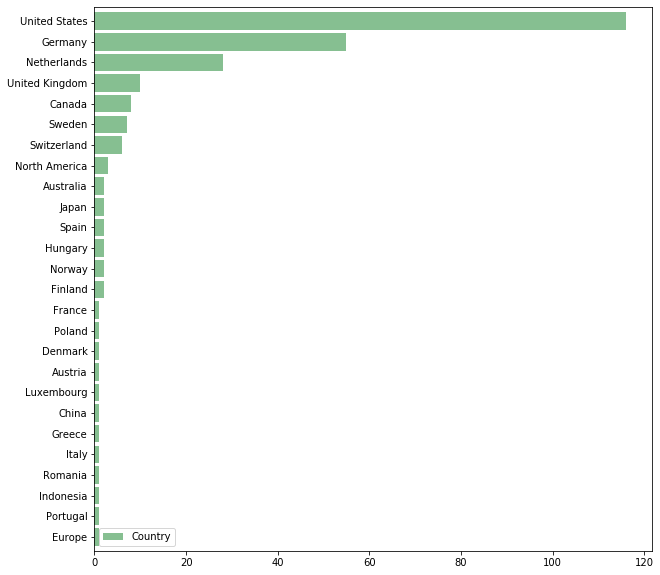

In [26]:
country = l2['Country'].value_counts()
country_df = pd.DataFrame(country)
country_df.plot(kind='barh', figsize=(10,10), color='#86bf91', zorder=2, width=0.85).invert_yaxis()
plt.savefig("../Project1/country_hbar.png")

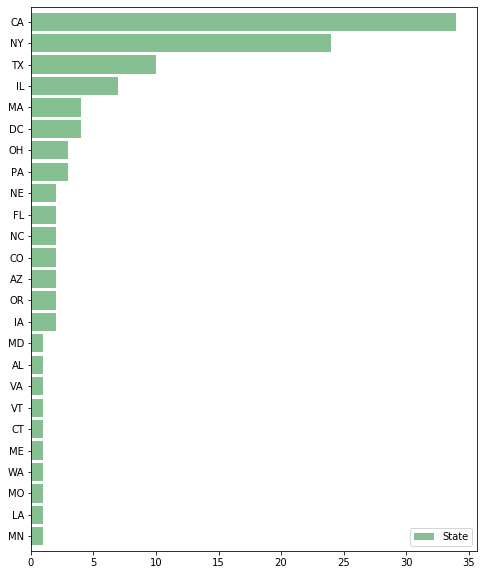

In [27]:
state = l2['State'].value_counts()
state_df = pd.DataFrame(state)
state_df.plot(kind='barh', figsize=(8,10), color='#86bf91', zorder=2, width=0.85).invert_yaxis()
plt.savefig("../Project1/state_hbar.png")

In [ ]:
#l2['Today'] = 'Tue Oct 22 23:59:59 UTC 2019'

#d1 = pd.to_datetime(data2['Today'], '%m/%d/%Y')
#d2 = pd.to_datetime(data2['created_at', '%m/%d/%Y'])

#def days_between(d1, d2):
#    entered = datetime.strptime(d1, "%Y-%m-%d")
#    today = datetime.strptime(d2, "%Y-%m-%d"))
#    return abs((today - entered).days)

#def days_between(d1, d2):
#    entered = d1.strftime("%Y-%m-%d")
#    today = d2.strftime("%Y-%m-%d")
#    return abs((today - entered).days)

In [28]:
l2['Today'] = '10/22/19'
l2.rename(columns={'created_at':'Entered'}, inplace=True)
time_df = pd.DataFrame(l2, columns=['Entered', 'Today'])

time_df['Entered Month'] = time_df['Entered'].str[4:7]
time_df['Entered Day'] = time_df['Entered'].str[8:10]
time_df['Entered Year'] = time_df['Entered'].str[-2:]

time_df['Entered Month']=time_df['Entered Month'].replace({'Jan':'01','Feb':'02','Mar':'03','Apr':'04','May':'05','Jun':'06',
                                                          'Jul':'07','Aug':'08','Sep':'09','Oct':'10','Nov':'11','Dec':'12'})

time_df['Entered On'] = time_df.pop('Entered Month')+'/'+time_df.pop('Entered Day')+'/'+time_df.pop('Entered Year')

#time_df['Age'] = time_df['Today']-time_df['Entered On']
time_df['Entered On']=pd.to_datetime(time_df['Entered On'])
time_df['Today']=pd.to_datetime(time_df['Today'])
time_df['Age'] = (time_df['Today']-time_df['Entered On']).dt.days
min = time_df['Age'].min()
max = time_df['Age'].max()
median = time_df['Age'].median()
mode = time_df['Age'].mode()
mean = time_df['Age'].mean()

time_df.describe()

,Age
count,286.000000
mean,174.933566
std,164.097700
min,1.000000
25%,18.000000
50%,57.000000
75%,348.750000
max,366.000000


In [29]:
l = l[~l['location'].str.contains('Berlin',na=False)] #na=False
l = l[~l['location'].str.contains('Athens',na=False)] #na=False
l = l[~l['location'].str.contains('London',na=False)] #na=False
l = l[~l['location'].str.contains('Hamburg',na=False)] #na=False
l = l[~l['location'].str.contains('Munich',na=False)] #na=False

l

,id,type,url,created_at,company,company_url,location,title,description,how_to_apply,company_logo,city,state_code_or_country
0,a96b9c4d-5fca-4ecc-83f2-88d7558a4162,Full Time,https://jobs.github.com/positions/a96b9c4d-5fc...,Wed Oct 23 16:36:13 UTC 2019,YouVersion,http://youversion.com/careers,"Edmond, OK",YouVersion Full-Stack Software Engineer,<p>The Full-Stack Software Engineer will be re...,"<p>Ready to apply?\nVisit <a href=""http://bit....",https://jobs.github.com/rails/active_storage/b...,Edmond,OK
1,b7d3856c-3ec3-4566-90a4-19ec369a9f7b,Full Time,https://jobs.github.com/positions/b7d3856c-3ec...,Wed Oct 23 15:10:00 UTC 2019,hte – the high throughput experimentation company,http://www.hte-company.com,Heidelberg,Senior Softwareentwickler .NET/C# (m/w/d) im B...,<p>Zur Verstärkung unseres Teams suchen wir ei...,"<p><a href=""https://htekarriere.redirect.your-...",https://jobs.github.com/rails/active_storage/b...,Heidelberg,None
2,0276f45a-0355-4d81-84b8-fe498cc5377f,Full Time,https://jobs.github.com/positions/0276f45a-035...,Wed Oct 23 14:59:13 UTC 2019,Reaktor,https://reaktor.com/careers/,"Lisbon, Portugal",Fearless Team Builder and Software Developer,<p>We at Reaktor are known for changing how th...,"<p>So, <a href=""https://www.reaktor.com/blog/a...",https://jobs.github.com/rails/active_storage/b...,Lisbon,Portugal
3,dbc59368-523c-455c-ab85-8f4e634e5dc1,Full Time,https://jobs.github.com/positions/dbc59368-523...,Wed Oct 23 14:49:07 UTC 2019,Reaktor,https://reaktor.com/careers/,"Lisbon, Portugal",Software Engineer With a Twist,<p>Curious about applying your tech skills in ...,"<p>So, <a href=""https://www.reaktor.com/blog/a...",https://jobs.github.com/rails/active_storage/b...,Lisbon,Portugal
4,343a5271-90fb-44fa-badc-8f1eca1ba30f,Full Time,https://jobs.github.com/positions/343a5271-90f...,Wed Oct 23 14:37:43 UTC 2019,INFICON,http:,"East Syracuse, NY",Senior Software Engineer,"<p>COMPANY OVERVIEW:\nINFICON is a growing, gl...","<p>Apply Here: <a href=""http://www.Click2Apply...",None,East Syracuse,NY
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,c307e4ca-d6a6-11e8-8f6e-f00ef74f7cb0,Full Time,https://jobs.github.com/positions/c307e4ca-d6a...,Tue Oct 23 09:36:02 UTC 2018,Squirro,https://www.squirro.com,Zurich,Senior Python Engineer,<p>We’re looking for senior engineers with sol...,"<p>Email your resume to <a href=""mailto:jobs@s...",https://jobs.github.com/rails/active_storage/b...,Zurich,None
299,40ca8a98-a4bb-11e8-9a40-f75b414612e1,Full Time,https://jobs.github.com/positions/40ca8a98-a4b...,Mon Oct 22 16:33:37 UTC 2018,Reaktor,http://reaktor.com,"New York, New York",A Challenge for Developers: Solve the Tracking...,<p><strong>Reaktor is looking for developers w...,"<p>Play the <a href=""https://tracking-game.rea...",https://jobs.github.com/rails/active_storage/b...,New York,New York
300,df5b47be-d612-11e8-88f4-50633736745c,Full Time,https://jobs.github.com/positions/df5b47be-d61...,Mon Oct 22 15:56:13 UTC 2018,Constructive,http://www.constructive.co,"New York, New York","Technology Team Lead, Design Agency for Social...","<p>Constructive (<a href=""https://constructive...",<p><strong>Interested? Great! Then please send...,https://jobs.github.com/rails/active_storage/b...,New York,New York
302,95048694-1952-11e8-86d5-38e7f24d7ed9,Full Time,https://jobs.github.com/positions/95048694-195...,Sun Oct 21 23:46:24 UTC 2018,Analytics Fire,http://analyticsfire.com,Remote,SENIOR FULL-STACK DEV WITH RUBY/PYTHON/REACT -...,<p><strong>Job Description</strong></p>\n<p>An...,<p>Please email your resume and cover letter t...,https://jobs.github.com/rails/active_storage/b...,Remote,None


In [30]:
# l.to_csv('export_before_merge3.csv')

In [31]:
s = l.merge(c_df, how="left", on="city")
c = pd.DataFrame(s).groupby(by="city").count() #[['lat'],['lng']]

In [32]:
locations = s[["lat", "lng","city"]]

In [33]:
sc = s.drop(columns=['company', 'company_logo', 'location', 'company_url', 'created_at','description', 'how_to_apply','id_x','title','type','url','state_id','state_name','county_name','zips','id_y'])
dsc = sc.apply (pd.to_numeric, errors='coerce')
dsc = sc.dropna()
dsc.to_csv('after_merge.csv')
sc

,city,state_code_or_country,lat,lng
0,Edmond,OK,35.6689,-97.4159
1,Edmond,OK,39.6271,-99.8197
2,Heidelberg,None,26.1831,-97.8850
3,Heidelberg,None,40.3915,-80.0923
4,Heidelberg,None,44.4931,-93.6265
...,...,...,...,...
736,Zurich,None,39.2323,-99.4346
737,New York,New York,40.6943,-73.9249
738,New York,New York,40.6943,-73.9249
739,Remote,None,NaN,NaN


In [34]:
# clean_locations = [x for x in locations if x != 'NaN']
dl = locations.apply (pd.to_numeric, errors='coerce')
dl = dl.dropna()
dl

,lat,lng,city


In [35]:
s.groupby(by="city").count()

,id_x,type,url,created_at,company,company_url,location,title,description,how_to_apply,company_logo,state_code_or_country,state_id,state_name,county_name,lat,lng,zips,id_y
city,,,,,,,,,,,,,,,,,,,
Affing (bei Augsburg),1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0
Aliso Viejo,5,5,5,5,5,2,5,5,5,5,0,5,5,5,5,5,5,5,5
Amsterdam,16,16,16,16,16,12,16,16,16,16,16,16,16,16,16,16,16,16,16
Atlanta,9,9,9,9,9,9,9,9,9,9,9,0,9,9,9,9,9,9,9
Austin,48,48,48,48,48,48,48,48,48,48,42,48,48,48,48,48,48,48,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Warsaw,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
Washington,72,72,72,72,72,72,72,72,72,72,72,54,72,72,72,72,72,72,72
Zoetermeer,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0


In [36]:
dsc

,city,state_code_or_country,lat,lng
0,Edmond,OK,35.6689,-97.4159
1,Edmond,OK,39.6271,-99.8197
6,Lisbon,Portugal,28.8823,-81.7812
7,Lisbon,Portugal,32.7894,-92.8672
8,Lisbon,Portugal,46.4385,-97.6841
...,...,...,...,...
734,New Orleans,LA,30.0687,-89.9288
735,Santa Barbara,CA,34.4285,-119.7202
737,New York,New York,40.6943,-73.9249
738,New York,New York,40.6943,-73.9249


In [37]:
dsc1 = dsc.drop(columns='city')
final_coordinates = dsc1.drop(columns='state_code_or_country')

In [38]:
final_coordinates

,lat,lng
0,35.6689,-97.4159
1,39.6271,-99.8197
6,28.8823,-81.7812
7,32.7894,-92.8672
8,46.4385,-97.6841
...,...,...
734,30.0687,-89.9288
735,34.4285,-119.7202
737,40.6943,-73.9249
738,40.6943,-73.9249


In [39]:
# Create a poverty Heatmap layer 
# fig.add_layer(gmaps.heatmap_layer(locations))
fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(final_coordinates,# weights=location_count, 
    dissipating=False, max_intensity=10,
    point_radius = 1)

fig.add_layer(heat_layer)

plt.savefig("Heatmap4.png")

fig

Figure(layout=FigureLayout(height='420px'))

<Figure size 432x288 with 0 Axes>

In [40]:
plt.savefig("Heatmap2.png")

<Figure size 432x288 with 0 Axes>

In [41]:
job_ct = l2['title'].count()

job_ct

286

In [42]:
eng = len(l2[l2['title'].str.contains('Eng')])
dvlpr = len(l2[l2['title'].str.contains('Dev')])
anlyst = len(l2[l2['title'].str.contains('Analyst')])
science = len(l2[l2['title'].str.contains('Scientist')])
senior = len(l2[l2['title'].str.contains('Sr')])
lead = len(l2[l2['title'].str.contains('Lead')])
remote = len(l2[l2['description'].str.contains('Remote')])
staff = len(l2[l2['title'].str.contains('Staff')])
principal = len(l2[l2['title'].str.contains('Principal')])

In [43]:
l2.insert(5, 'Title Bucket', 'Other')

# jobs =[]

for job in l2.iterrows():
    if 'Analyst' in job[1]['title']:
        job[1]['Title Bucket'] = 'Analyst'
    elif 'ANALYST' in job[1]['title']:
        job[1]['Title Bucket'] = 'Analyst'
    elif 'analyst' in job[1]['title']:
        job[1]['Title Bucket'] = 'Analyst'
    elif 'Scientist' in job[1]['title']:
        job[1]['Title Bucket'] = 'Scientist'
    elif 'scientist' in job[1]['title']:
        job[1]['Title Bucket'] = 'Scientist'
    elif 'SCIENTIST' in job[1]['title']:
        job[1]['Title Bucket'] = 'Scientist'
    elif 'Dev' in job[1]['title']:
        job[1]['Title Bucket'] = 'Developer'
    elif 'dev' in job[1]['title']:
        job[1]['Title Bucket'] = 'Developer'
    elif 'DEV' in job[1]['title']:
        job[1]['Title Bucket'] = 'Developer'
    elif 'Eng' in job[1]['title']:
        job[1]['Title Bucket'] = 'Engineer'
    elif 'eng' in job[1]['title']:
        job[1]['Title Bucket'] = 'Engineer'
    elif 'ENG' in job[1]['title']:
        job[1]['Title Bucket'] = 'Engineer'
    elif 'Staff' in job[1]['title']:
        job[1]['Title Bucket'] = 'Staff'
    elif 'Principal' in job[1]['title']:
        job[1]['Title Bucket'] = 'Principal'
        
l2.head()

,id,type,url,Entered,company,Title Bucket,company_url,location_x,title,description,how_to_apply,company_logo,location_y,Remote,City,County,State,Country,Today
0,b3704276-7ed7-4880-8d45-f35052964659,Full Time,https://jobs.github.com/positions/b3704276-7ed...,Mon Oct 21 21:12:11 UTC 2019,Datadog,Engineer,http:,NewYork,Software Engineer- Frontend,<p>Have you been writing beautiful web UIs for...,"<p><a href=""https://grnh.se/f0a956961"">https:/...",https://jobs.github.com/rails/active_storage/b...,"New York, New York, United States",NaN,New York,New York,NY,United States,10/22/19
1,a71fdb23-3447-4b5f-8fca-db08a774e48b,Full Time,https://jobs.github.com/positions/a71fdb23-344...,Mon Oct 21 18:28:48 UTC 2019,Abt Associates,Developer,https://www.abtassociates.com/,"Cambridge, MA",Senior Application Developer,<p><strong>Opportunity</strong></p>\n<p>Abt As...,"<p>Apply online here:\n<a href=""https://career...",https://jobs.github.com/rails/active_storage/b...,"Cambridge, MA, United States",NaN,Cambridge,Middlesex,MA,United States,10/22/19
2,df2d1d3f-4408-45ca-b586-3f07eb24e0e6,Full Time,https://jobs.github.com/positions/df2d1d3f-440...,Mon Oct 21 18:25:41 UTC 2019,Sertifi,Developer,https://corp.sertifi.com/,"Chicago, IL",Senior Software Developer,<p>Sertifi offers an Agreement Platform built ...,"<p><a href=""https://sertifi.applytojob.com/app...",None,"Chicago, IL, United States",NaN,Chicago,Cook,IL,United States,10/22/19
3,9dde244a-f5b9-458d-b99b-7cfa19cfa798,Full Time,https://jobs.github.com/positions/9dde244a-f5b...,Mon Oct 21 14:31:18 UTC 2019,wrnch,Developer,https://wrnch.ai/,Montreal,Senior Software Developer,<p>wrnch is one of Canada’s first profitable A...,<p>Please apply via our website -&gt; <a href=...,https://jobs.github.com/rails/active_storage/b...,"Montreal, , Canada",NaN,Montreal,NaN,NaN,Canada,10/22/19
4,36b9af5b-fcc0-457d-b7f3-efc61625bbdb,Full Time,https://jobs.github.com/positions/36b9af5b-fcc...,Mon Oct 21 12:46:24 UTC 2019,Shell,Other,http://www.shell.com,"London, UK",Scrum Master - Agile Hub,<p><strong>Job Description</strong></p>\n<p><s...,"<p><a href=""https://shellinternational.redirec...",https://jobs.github.com/rails/active_storage/b...,"London, , United Kingdom",NaN,London,NaN,NaN,United Kingdom,10/22/19


In [44]:
l2.insert(6, 'Senior Bucket', 'Other')

for z in l2.iterrows():
    if 'Lead' in z[1]['title']:
        z[1]['Senior Bucket'] = 'Lead'
    elif 'lead' in z[1]['title']:
        z[1]['Senior Bucket'] = 'Lead'
    elif 'LEAD' in z[1]['title']:
        z[1]['Senior Bucket'] = 'Lead'
    elif 'Senior' in z[1]['title']:
        z[1]['Senior Bucket'] = 'Senior'
    elif 'SENIOR' in z[1]['title']:
        z[1]['Senior Bucket'] = 'Senior'
    elif 'senior' in z[1]['title']:
        z[1]['Senior Bucket'] = 'Senior'
    elif 'Sr' in z[1]['title']:
        z[1]['Senior Bucket'] = 'Senior'
    
l2

,id,type,url,Entered,company,Title Bucket,Senior Bucket,company_url,location_x,title,description,how_to_apply,company_logo,location_y,Remote,City,County,State,Country,Today
0,b3704276-7ed7-4880-8d45-f35052964659,Full Time,https://jobs.github.com/positions/b3704276-7ed...,Mon Oct 21 21:12:11 UTC 2019,Datadog,Engineer,Other,http:,NewYork,Software Engineer- Frontend,<p>Have you been writing beautiful web UIs for...,"<p><a href=""https://grnh.se/f0a956961"">https:/...",https://jobs.github.com/rails/active_storage/b...,"New York, New York, United States",NaN,New York,New York,NY,United States,10/22/19
1,a71fdb23-3447-4b5f-8fca-db08a774e48b,Full Time,https://jobs.github.com/positions/a71fdb23-344...,Mon Oct 21 18:28:48 UTC 2019,Abt Associates,Developer,Senior,https://www.abtassociates.com/,"Cambridge, MA",Senior Application Developer,<p><strong>Opportunity</strong></p>\n<p>Abt As...,"<p>Apply online here:\n<a href=""https://career...",https://jobs.github.com/rails/active_storage/b...,"Cambridge, MA, United States",NaN,Cambridge,Middlesex,MA,United States,10/22/19
2,df2d1d3f-4408-45ca-b586-3f07eb24e0e6,Full Time,https://jobs.github.com/positions/df2d1d3f-440...,Mon Oct 21 18:25:41 UTC 2019,Sertifi,Developer,Senior,https://corp.sertifi.com/,"Chicago, IL",Senior Software Developer,<p>Sertifi offers an Agreement Platform built ...,"<p><a href=""https://sertifi.applytojob.com/app...",None,"Chicago, IL, United States",NaN,Chicago,Cook,IL,United States,10/22/19
3,9dde244a-f5b9-458d-b99b-7cfa19cfa798,Full Time,https://jobs.github.com/positions/9dde244a-f5b...,Mon Oct 21 14:31:18 UTC 2019,wrnch,Developer,Senior,https://wrnch.ai/,Montreal,Senior Software Developer,<p>wrnch is one of Canada’s first profitable A...,<p>Please apply via our website -&gt; <a href=...,https://jobs.github.com/rails/active_storage/b...,"Montreal, , Canada",NaN,Montreal,NaN,NaN,Canada,10/22/19
4,36b9af5b-fcc0-457d-b7f3-efc61625bbdb,Full Time,https://jobs.github.com/positions/36b9af5b-fcc...,Mon Oct 21 12:46:24 UTC 2019,Shell,Other,Other,http://www.shell.com,"London, UK",Scrum Master - Agile Hub,<p><strong>Job Description</strong></p>\n<p><s...,"<p><a href=""https://shellinternational.redirec...",https://jobs.github.com/rails/active_storage/b...,"London, , United Kingdom",NaN,London,NaN,NaN,United Kingdom,10/22/19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,40ca8a98-a4bb-11e8-9a40-f75b414612e1,Full Time,https://jobs.github.com/positions/40ca8a98-a4b...,Mon Oct 22 16:33:37 UTC 2018,Reaktor,Developer,Other,http://reaktor.com,"New York, New York",A Challenge for Developers: Solve the Tracking...,<p><strong>Reaktor is looking for developers w...,"<p>Play the <a href=""https://tracking-game.rea...",https://jobs.github.com/rails/active_storage/b...,"New York, New York",NaN,New York,New York,NY,United States,10/22/19
282,df5b47be-d612-11e8-88f4-50633736745c,Full Time,https://jobs.github.com/positions/df5b47be-d61...,Mon Oct 22 15:56:13 UTC 2018,Constructive,Other,Lead,http://www.constructive.co,"New York, New York","Technology Team Lead, Design Agency for Social...","<p>Constructive (<a href=""https://constructive...",<p><strong>Interested? Great! Then please send...,https://jobs.github.com/rails/active_storage/b...,"New York, New York",NaN,New York,New York,NY,United States,10/22/19
283,da8ad94e-d5f8-11e8-8225-f199d46197fd,Full Time,https://jobs.github.com/positions/da8ad94e-d5f...,Mon Oct 22 12:49:21 UTC 2018,www.FaktorZehn.com,Other,Senior,http://www.FaktorZehn.com,"Munich, Berlin",Senior Software Entwickler Java (m/w/d),<p>Lust auf Veränderung?</p>\n<p>Du bist ein J...,<p>Klicken Sie hier um zum Bewerbungsformular ...,https://jobs.github.com/rails/active_storage/b...,"Munich, Berlin",NaN,Munich,NaN,NaN,Germany,10/22/19
284,95048694-1952-11e8-86d5-38e7f24d7ed9,Full Time,https://jobs.github.com/positions/95048694-195...,Sun Oct 21 23:46:24 UTC 2018,Analytics Fire,Developer,Senior,http://analyticsfire.com,Remote,SENIOR FULL-STACK D

In [45]:
l2.insert(6, 'Remote?', 'Onsite')

for a in l2.iterrows():
    if 'Remote' in a[1]['location'] or 'Remote' in a[1]['title']:
        a[1]['Remote?'] = 'Remote'
    elif 'Remote' in a[1]['location'] or 'Remote' in a[1]['title']:
        a[1['Remote?']] = 'Remote'
    elif 'Remote' in a[1]['location'] or 'Remote' in a[1]['title']:
        a[1]['Remote?'] = 'Remote'
        
l2

KeyError: 'location'

In [52]:
l2.insert(7, 'Degree Indication', 'None Listed')

for c in l2.iterrows():
    if 'Master' in c[1]['description']:
        c[1]['Degree Indication'] = 'Master'
    elif 'master' in c[1]['description']:
        c[1]['Degree Indication'] = 'Master'
    elif 'Bachelor' in c[1]['description']:
        c[1]['Degree Indication'] = 'Bachelor'
    elif 'bachelor' in c[1]['description']:
        c[1]['Degree Indication'] = 'Bachelor'
    elif 'camp' in c[1]['description']:
        c[1]['Degree Indication'] = 'Bootcamp'
l2

,id,type,url,Entered,company,Title Bucket,Remote?,Degree Indication,Senior Bucket,company_url,...,description,how_to_apply,company_logo,location_y,Remote,City,County,State,Country,Today
0,b3704276-7ed7-4880-8d45-f35052964659,Full Time,https://jobs.github.com/positions/b3704276-7ed...,Mon Oct 21 21:12:11 UTC 2019,Datadog,Engineer,Onsite,Master,Other,http:,...,<p>Have you been writing beautiful web UIs for...,"<p><a href=""https://grnh.se/f0a956961"">https:/...",https://jobs.github.com/rails/active_storage/b...,"New York, New York, United States",NaN,New York,New York,NY,United States,10/22/19
1,a71fdb23-3447-4b5f-8fca-db08a774e48b,Full Time,https://jobs.github.com/positions/a71fdb23-344...,Mon Oct 21 18:28:48 UTC 2019,Abt Associates,Developer,Onsite,None Listed,Senior,https://www.abtassociates.com/,...,<p><strong>Opportunity</strong></p>\n<p>Abt As...,"<p>Apply online here:\n<a href=""https://career...",https://jobs.github.com/rails/active_storage/b...,"Cambridge, MA, United States",NaN,Cambridge,Middlesex,MA,United States,10/22/19
2,df2d1d3f-4408-45ca-b586-3f07eb24e0e6,Full Time,https://jobs.github.com/positions/df2d1d3f-440...,Mon Oct 21 18:25:41 UTC 2019,Sertifi,Developer,Onsite,Bachelor,Senior,https://corp.sertifi.com/,...,<p>Sertifi offers an Agreement Platform built ...,"<p><a href=""https://sertifi.applytojob.com/app...",None,"Chicago, IL, United States",NaN,Chicago,Cook,IL,United States,10/22/19
3,9dde244a-f5b9-458d-b99b-7cfa19cfa798,Full Time,https://jobs.github.com/positions/9dde244a-f5b...,Mon Oct 21 14:31:18 UTC 2019,wrnch,Developer,Onsite,Bachelor,Senior,https://wrnch.ai/,...,<p>wrnch is one of Canada’s first profitable A...,<p>Please apply via our website -&gt; <a href=...,https://jobs.github.com/rails/active_storage/b...,"Montreal, , Canada",NaN,Montreal,NaN,NaN,Canada,10/22/19
4,36b9af5b-fcc0-457d-b7f3-efc61625bbdb,Full Time,https://jobs.github.com/positions/36b9af5b-fcc...,Mon Oct 21 12:46:24 UTC 2019,Shell,Other,Onsite,Master,Other,http://www.shell.com,...,<p><strong>Job Description</strong></p>\n<p><s...,"<p><a href=""https://shellinternational.redirec...",https://jobs.github.com/rails/active_storage/b...,"London, , United Kingdom",NaN,London,NaN,NaN,United Kingdom,10/22/19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,40ca8a98-a4bb-11e8-9a40-f75b414612e1,Full Time,https://jobs.github.com/positions/40ca8a98-a4b...,Mon Oct 22 16:33:37 UTC 2018,Reaktor,Developer,Onsite,None Listed,Other,http://reaktor.com,...,<p><strong>Reaktor is looking for developers w...,"<p>Play the <a href=""https://tracking-game.rea...",https://jobs.github.com/rails/active_storage/b...,"New York, New York",NaN,New York,New York,NY,United States,10/22/19
282,df5b47be-d612-11e8-88f4-50633736745c,Full Time,https://jobs.github.com/positions/df5b47be-d61...,Mon Oct 22 15:56:13 UTC 2018,Constructive,Other,Onsite,None Listed,Lead,http://www.constructive.co,...,"<p>Constructive (<a href=""https://constructive...",<p><strong>Interested? Great! Then please send...,https://jobs.github.com/rails/active_storage/b...,"New York, New York",NaN,New York,New York,NY,United States,10/22/19
283,da8ad94e-d5f8-11e8-8225-f199d46197fd,Full Time,https://jobs.github.com/positions/da8ad94e-d5f...,Mon Oct 22 12:49:21 UTC 2018,www.FaktorZehn.com,Other,Onsite,None Listed,Senior,http://www.FaktorZehn.com,...,<p>Lust auf Veränderung?</p>\n<p>Du bist ein J...,<p>Klicken Sie hier um zum Bewerbungsformular ...,https://jobs.github.com/rails/active_storage/b...,"Munich, Berlin",NaN,Munich,NaN,NaN,Germany,10/22/19
284,95048694-1952-11e8-86d5-38e7f24d7ed9,Full Time,https://jobs.github.com/positions/95048694-195...,Sun Oct 21 23:46:24 UTC 2018,Analytics Fire,Developer,Onsite,None Listed,Senior,http://analyticsfire.com,...,<p><strong>Job Description</strong></p>\n<p>An...,<p>Please email your resume and cover letter t...,https://jobs.github.com/rails/active_storage/b...,Remote,Remote,NaN,NaN,NaN,NaN,10/22/19


In [53]:
sorted_df = l2.sort_values(['Degree Indication'])
bootcamp = sorted_df['Degree Indication']
sorted_df

,id,type,url,Entered,company,Title Bucket,Remote?,Degree Indication,Senior Bucket,company_url,...,description,how_to_apply,company_logo,location_y,Remote,City,County,State,Country,Today
208,dc428b94-e42e-11e8-91e2-23879ca9e8b0,Full Time,https://jobs.github.com/positions/dc428b94-e42...,Fri Nov 09 14:51:11 UTC 2018,New York University,Developer,Onsite,Bachelor,Other,None,...,<p>As a member of the Technology Development G...,"<p>Apply Here: <a href=""http://www.Click2apply...",None,"New York, New York",NaN,New York,New York,NY,United States,10/22/19
175,93a08496-e9c8-11e8-8e1e-09934e650343,Full Time,https://jobs.github.com/positions/93a08496-e9c...,Fri Nov 16 17:55:45 UTC 2018,Target,Other,Onsite,Bachelor,Senior,https://corporate.target.com/careers/,...,"<p>Target is an iconic brand, a Fortune 50 com...","<p><a href=""https://track.talentbrew.com?jobme...",None,"Minneapolis, MN",NaN,Minneapolis,Hennepin,MN,United States,10/22/19
83,e9e632a7-c756-40c9-b1ca-c3eb5c7f9ce3,Full Time,https://jobs.github.com/positions/e9e632a7-c75...,Sat Aug 03 00:50:23 UTC 2019,Game Closure,Engineer,Onsite,Bachelor,Senior,http://gameclosure.com,...,"<p>GAME CLOSURE</p>\n<p>San Francisco, Mountai...","<p><a href=""https://jobs.lever.co/gameclosure/...",https://jobs.github.com/rails/active_storage/b...,"San Francisco, Mountain View, Tokyo, Remote",Remote,San Francisco,San Francisco,CA,United States,10/22/19
164,7d0d5cf0-ec1f-11e8-9834-c8e30f51c014,Full Time,https://jobs.github.com/positions/7d0d5cf0-ec1...,Mon Nov 19 17:21:35 UTC 2018,Simons Foundation,Developer,Onsite,Bachelor,Other,None,...,<p>POSITION SUMMARY</p>\n<p>This role will sup...,"<p><a href=""http://www.Click2apply.net/tnq3zqd...",https://jobs.github.com/rails/active_storage/b...,"New York, New York",NaN,New York,New York,NY,United States,10/22/19
128,257fce32-ad53-4621-be70-66abd466fdad,Full Time,https://jobs.github.com/positions/257fce32-ad5...,Thu Sep 26 21:27:56 UTC 2019,SailPoint,Engineer,Onsite,Bachelor,Other,https://www.sailpoint.com/,...,<p>SailPoint is seeking a senior software engi...,"<p><a href=""https://sailpoint.wd1.myworkdayjob...",https://jobs.github.com/rails/active_storage/b...,"Austin, Texas",NaN,Austin,Travis,TX,United States,10/22/19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,d43f9147-973b-4277-9146-9009db675e92,Full Time,https://jobs.github.com/positions/d43f9147-973...,Fri Sep 27 10:29:39 UTC 2019,Impero Software,Engineer,Onsite,None Listed,Senior,http://www.imperosoftware.com,...,"<p>At Impero, we've been in Education Technolo...","<p>Email your CV to <a href=""mailto:engineerin...",https://jobs.github.com/rails/active_storage/b...,Remote,Remote,NaN,NaN,NaN,NaN,10/22/19
123,1ebfd8f5-b260-498e-901d-4165de77e6d5,Full Time,https://jobs.github.com/positions/1ebfd8f5-b26...,Fri Sep 27 10:13:40 UTC 2019,Impero Software,Developer,Onsite,None Listed,Senior,http://www.imperosoftware.com,...,"<p>At Impero, we've been in Education Technolo...","<p>Email your CV to <a href=""mailto:engineerin...",https://jobs.github.com/rails/active_storage/b...,Remote,Remote,NaN,NaN,NaN,NaN,10/22/19
124,9e032cc0-8abc-4848-a089-bb1f36293219,Full Time,https://jobs.github.com/positions/9e032cc0-8ab...,Fri Sep 27 09:50:06 UTC 2019,GOhiring GmbH,Developer,Onsite,None Listed,Senior,https://www.gohiring.com,...,<p><strong>About us</strong></p>\n<p>We are lo...,"<p><a href=""https://tracking.gohiring.com/h/48...",https://jobs.github.com/rails/active_storage/b...,"Berlin, Germany",NaN,Berlin,NaN,NaN,Germany,10/22/19
109,939ca606-64cd-4c55-b9d6-cd059ca92221,Contract,https://jobs.github.com/positions/939ca606-64c...,Mon Sep 30 14:12:01 UTC 2019,Bank for International Settlements,Engineer,Onsite,None Listed,Senior,https://www.bis.org/,...,<p>The Bank for International Settlements is a...,"<p><a href=""https://jobstats.robopost.com/coun...",https://jobs.github.com/rails/active_storage/b...,"Basel, Switzerland",NaN,Basel,NaN,NaN,Switzerland,10/22/19


In [54]:
rmt_ct = len(sorted_df[sorted_df['Remote?'].str.contains('Remote')])
onsite_ct = len(sorted_df[sorted_df['Remote?'].str.contains('Onsite')])

prct_remote = ((rmt_ct / job_ct) * 100)
prct_onsite = ((onsite_ct / job_ct) * 100)

rmt_df = pd.DataFrame({'Remote %': [prct_remote],'Remote Count': [rmt_ct],
                       'Onsite %': [prct_onsite],'Onsite Count': [onsite_ct]})

rmt_df.head()

,Remote %,Remote Count,Onsite %,Onsite Count
0,0.0,0,100.0,286


/Users/brian.abbe/anaconda3/envs/Pythondata/lib/python3.6/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


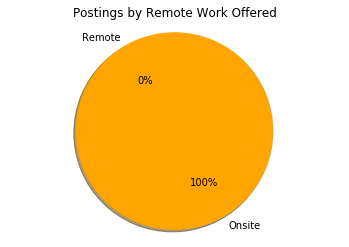

In [55]:
remote = ['Remote', 'Onsite']
remote_jobs = [rmt_df['Remote %'], rmt_df['Onsite %']]
colors = ["red","orange"]

explode = (0,0)

plt.pie(remote_jobs, labels=remote, colors=colors,
        autopct="%1.0f%%", shadow=True, startangle=120)

plt.title('Postings by Remote Work Offered')
plt.axis("equal")
plt.savefig("../Project1/remote_jobs.png")
plt.show()

In [56]:
sr_ct = len(sorted_df[sorted_df['Senior Bucket'].str.contains('Senior')])
lead_ct = len(sorted_df[sorted_df['Senior Bucket'].str.contains('Lead')])
other_ct = len(sorted_df[sorted_df['Senior Bucket'].str.contains('Other')])

sr_prct = ((sr_ct / job_ct) * 100)
lead_prct = ((lead_ct / job_ct) * 100)
other_prct = ((other_ct / job_ct) * 100)

sr_df = pd.DataFrame({'Senior Job %': [sr_prct],'Senior Jobs': [sr_ct],
'Lead Job %': [lead_prct], 'Lead Jobs': [lead_ct], 'Junior/Other Job %': [other_prct],
'Junior/Other Jobs': [other_ct]})

sr_df

,Senior Job %,Senior Jobs,Lead Job %,Lead Jobs,Junior/Other Job %,Junior/Other Jobs
0,31.468531,90,5.594406,16,62.937063,180


/Users/brian.abbe/anaconda3/envs/Pythondata/lib/python3.6/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


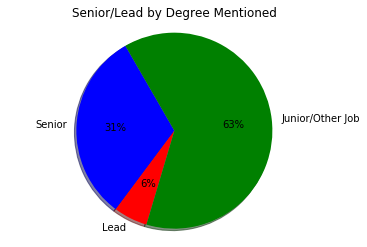

In [57]:
manager = ['Senior', 'Lead', 'Junior/Other Job']
lead_jobs = [sr_df['Senior Job %'], sr_df['Lead Job %'],
               sr_df['Junior/Other Job %']]
colors = ["blue","red","green"]
explode = (0,0,0)

plt.pie(lead_jobs, labels=manager, colors=colors,
        autopct="%1.0f%%", shadow=True, startangle=120)

plt.title('Senior/Lead by Degree Mentioned')
plt.axis("equal")
plt.savefig("../Project1/senior_jobs.png")
plt.show()

In [58]:
# sorted_df = sorted_df.reset_index()
analyst_ct = len(sorted_df[sorted_df['Title Bucket'].str.contains('Analyst')])
eng_ct = len(sorted_df[sorted_df['Title Bucket'].str.contains('Engineer')])
dvlpr_ct = len(sorted_df[sorted_df['Title Bucket'].str.contains('Developer')])
scientist_ct = len(sorted_df[sorted_df['Title Bucket'].str.contains('Scientist')])
staff_ct = len(sorted_df[sorted_df['Title Bucket'].str.contains('Staff')])
principal_ct = len(sorted_df[sorted_df['Title Bucket'].str.contains('Scientist')])
other2_ct = len(sorted_df[sorted_df['Title Bucket'].str.contains('Other')])

analyst_prct = ((analyst_ct / job_ct) * 100)
eng_prct = ((eng_ct / job_ct) * 100)
dvlpr_prct = ((dvlpr_ct / job_ct) * 100)
scientist_prct = ((scientist_ct / job_ct) * 100)
staff_prct = ((staff_ct / job_ct) * 100)
principal_prct = ((principal_ct / job_ct) * 100)
other2_prct = ((other2_ct / job_ct) * 100)
 

title_df = pd.DataFrame({'Analyst Job %': [analyst_prct],'Analyst Jobs': [analyst_ct],
'Engineer Job %': [eng_prct], 'Engineer Jobs': [eng_ct], 'Developer Job %': [dvlpr_prct],
'Developer Jobs': [dvlpr_ct], 'Scientist Job %': [scientist_prct], 'Scientist Jobs': [scientist_ct],
'Staff Jobs': [staff_ct], 'Staff Job %': [staff_prct], 'Principal Jobs': [principal_ct], 'Principal Job %':
[principal_prct], 'Other Jobs': [other2_ct], 'Other Job %': [other2_prct]})

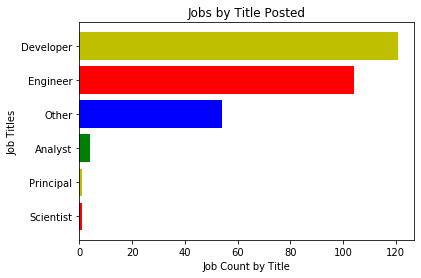

<Figure size 432x288 with 0 Axes>

In [59]:
job_titles = [scientist_ct, principal_ct, analyst_ct, other2_ct,
              eng_ct, dvlpr_ct]
titles = ['Scientist', 'Principal', 'Analyst', 'Other', 'Engineer', 'Developer']
y_pos = np.arange(len(titles))
 
# Create horizontal bars
plt.barh(y_pos, job_titles, color='rygb', zorder=2)
 
# Create names on the y-axis
plt.yticks(y_pos, titles)
plt.xlabel("Job Count by Title")
plt.ylabel("Job Titles")
plt.title('Jobs by Title Posted')
 
# Show graphic
plt.show()
plt.savefig("../Project1/jobs_by_title.png")
titles = ['Engineer', 'Developer', 'Analyst', 'Scientist', 'Staff', 'Principal', 'Other']
job_titles = [eng_ct, dvlpr_ct, other2_ct,
              analyst_ct, staff_ct, principal_ct,
              scientist_ct]

In [60]:
# Degree Preference

master_ct = len(l2[l2['Degree Indication'].str.contains("Master")])
master_prct = (master_ct / job_ct) * 100

bach_ct = len(l2[l2['Degree Indication'].str.contains('Bachelor')])
bach_prct = (bach_ct / job_ct) * 100

boot_ct = len(l2[l2['Degree Indication'].str.contains('Bootcamp')])
boot_prct = (boot_ct / job_ct) * 100

none_ct = len(l2[l2['Degree Indication'].str.contains('None Listed')])
none_prct = (none_ct / job_ct) * 100

degree_df = pd.DataFrame({'Master Job Percent': [master_prct], 'Bachelor Job Percent': [bach_prct],
                          'Bootcamp Job Percent': [boot_prct], 'No Degree Listed Job Percent': [none_prct]})

/Users/brian.abbe/anaconda3/envs/Pythondata/lib/python3.6/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


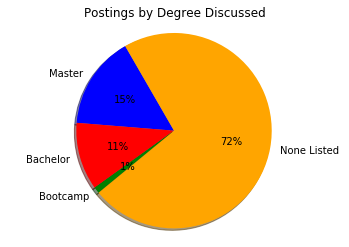

In [61]:
degrees = ['Master', 'Bachelor', 'Bootcamp', 'None Listed']
degree_jobs = [degree_df['Master Job Percent'], degree_df['Bachelor Job Percent'],
               degree_df['Bootcamp Job Percent'], degree_df['No Degree Listed Job Percent']]
colors = ["blue","red","green","orange"]
explode = (0,0,0,0)

plt.pie(degree_jobs, labels=degrees, colors=colors,
        autopct="%1.0f%%", shadow=True, startangle=120)

plt.title('Postings by Degree Discussed')
plt.axis("equal")
plt.savefig("../Project1/jobs_by_degree.png")
plt.show()

In [62]:
# Benefits

child_ct = len(l2[l2['description'].str.contains('Child')])
child2_ct = len(l2[l2['description'].str.contains('child')])
total_child = child_ct + child2_ct
child_prct = (total_child / job_ct) * 100

stock_ct = len(l2[l2['description'].str.contains('Stock')])
stock2_ct = len(l2[l2['description'].str.contains('stock')])
total_stock = stock_ct + stock2_ct
stock_prct = (total_stock / job_ct) * 100

comp_ct = len(l2[l2['description'].str.contains('Competitive salary')])
comp2_ct = len(l2[l2['description'].str.contains('competitive salary')])
comp3_ct = len(l2[l2['description'].str.contains('competitive compensation package')])
total_comp = comp_ct + comp2_ct + comp3_ct
comp_prct = (total_comp / job_ct) * 100

benefit_df = pd.DataFrame({'Offers Stock Options': [total_stock], 'Offers Child Care': [total_child],
                           'Stock Option %': [stock_prct], 'Child Care %': [child_prct],
                          'Competitive Salaries': [total_comp], 'Competitive Salary by %': [comp_prct]})

benefit_df

,Offers Stock Options,Offers Child Care,Stock Option %,Child Care %,Competitive Salaries,Competitive Salary by %
0,12,12,4.195804,4.195804,32,11.188811


TypeError: 'int' object is not callable

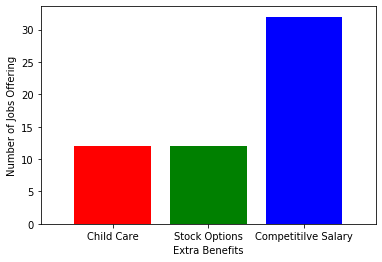

In [63]:
benefits = ['Child Care', 'Stock Options', 'Competitilve Salary']
benefit_cts = [total_stock, total_child,
               total_comp]
x_axis = np.arange(len(benefits))
 
# Create horizontal bars
plt.bar(x_axis, benefit_cts, color='rgb', zorder=2)
 
# Create names on the y-axis
plt.xticks(x_axis, benefits)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.xlabel("Extra Benefits")
plt.ylabel("Number of Jobs Offering")
plt.ylim(0, max(benefit_cts)+5)
plt.title("Extra Benefits Offered by Postings")
 
# Show graphic
plt.savefig("../Project1/benefits_by_job.png")
plt.show()

In [64]:
grouped1 = sorted_df.groupby(['Degree Indication', 'Senior Bucket'])

bach_lead = 0
bach_sr = 0
master_lead = 0
master_sr = 0

for d in l2.iterrows():
    if 'Bachelor' in d[1]['Degree Indication'] and 'Lead' in d[1]['Senior Bucket']:
        bach_lead += 1
    elif 'Bachelor' in d[1]['Degree Indication'] and 'Senior' in d[1]['Senior Bucket']:
        bach_sr += 1
    elif 'Master' in d[1]['Degree Indication'] and 'Lead' in d[1]['Senior Bucket']:
        master_lead += 1
    elif 'Master' in d[1]['Degree Indication'] and 'Senior' in d[1]['Senior Bucket']:
        master_sr += 1

In [65]:
grouped2 = sorted_df.groupby(['Degree Indication', 'Title Bucket'])

bach_analyst = 0
bach_dvlpr = 0
bach_eng = 0
master_analyst = 0
master_dvlpr = 0
master_eng = 0

for e in sorted_df.iterrows():
    if 'Bachelor' in e[1]['Degree Indication'] and 'Analyst' in e[1]['Title Bucket']:
        bach_analyst += 1
    elif 'Bachelor' in e[1]['Degree Indication'] and 'Developer' in e[1]['Title Bucket']:
        bach_dvlpr += 1
    elif 'Bachelor' in e[1]['Degree Indication'] and 'Engineer' in e[1]['Title Bucket']:
        bach_eng += 1
    elif 'Master' in e[1]['Degree Indication'] and 'Analyst' in e[1]['Title Bucket']:
        master_analyst += 1
    elif 'Master' in e[1]['Degree Indication'] and 'Developer' in e[1]['Title Bucket']:
        master_dvlpr += 1
    elif 'Master' in e[1]['Degree Indication'] and 'Engineer' in e[1]['Title Bucket']:
        master_eng += 1

In [66]:
# Null hypothesis. If there is no correlation between degree level and working remote, 
# we should see no relationship between remote work jobs and degree level

grouped2 = sorted_df.groupby(['Degree Indication', 'Title Bucket'])

bach_remote = 0
bach_onsite = 0
master_remote = 0
master_onsite = 0
none_remote = 0
none_onsite = 0

for f in sorted_df.iterrows():
    if 'Bachelor' in f[1]['Degree Indication'] and 'Remote' in f[1]['Remote?']:
        bach_remote += 1
    elif 'Bachelor' in f[1]['Degree Indication'] and 'Onsite' in f[1]['Remote?']:
        bach_onsite += 1
    elif 'Master' in f[1]['Degree Indication'] and 'Remote' in f[1]['Remote?']:
        master_remote += 1
    elif 'Master' in f[1]['Degree Indication'] and 'Onsite' in f[1]['Remote?']:
        master_onsite += 1
    elif 'None Listed' in f[1]['Degree Indication'] and 'Remote' in f[1]['Remote?']:
        none_remote += 1
    elif 'None Listed' in f[1]['Degree Indication'] and 'Onsite' in f[1]['Remote?']:
        none_onsite += 1

TypeError: 'int' object is not callable

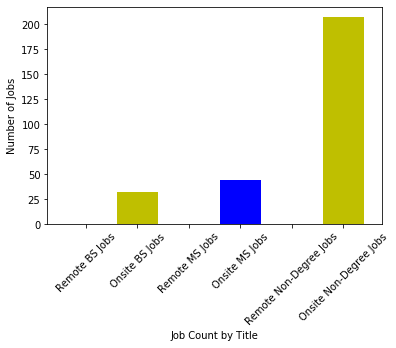

In [67]:
# Degree breakdown pie chart
rmt_deg = ['Remote BS Jobs', 'Onsite BS Jobs', 'Remote MS Jobs',
           'Onsite MS Jobs', 'Remote Non-Degree Jobs', 'Onsite Non-Degree Jobs']
remote_onsite = [bach_remote, bach_onsite, master_remote, master_onsite,
           none_remote, none_onsite]
x_axis = np.arange(len(rmt_deg))
 
# Create horizontal bars
plt.bar(x_axis, remote_onsite, color='rygb', zorder=2)
 
# Create names on the y-axis
plt.xticks(x_axis, rmt_deg, rotation=45)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.xlabel("Job Count by Title")
plt.ylabel("Number of Jobs")
plt.ylim(0, max(remote_onsite)+10)
plt.title("Remote/Onsite Jobs by Degree")
 
# Show graphic
plt.show()
plt.savefig("../Project1/remote_by_degree.png")

In [68]:
# MICHELLE'S CODE
# Merging clean location data
mt_data_df = pd.DataFrame(l)
mt_data_df.drop(['how_to_apply', 'company_logo', 'company_url', ], axis=1)
clean_location = pd.read_csv(cleancities)
mt_data2 = pd.merge(mt_data_df, clean_location, on='id')
mt_data2.drop(['company_logo', 'company_url', 'how_to_apply', 'location_x', 'url', 'location_y'], axis=1)
mt_df2 = pd.DataFrame(mt_data2)
mt_data2


,id,type,url,created_at,company,company_url,location_x,title,description,how_to_apply,company_logo,city,state_code_or_country,location_y,Remote,City,County,State,Country
0,b3704276-7ed7-4880-8d45-f35052964659,Full Time,https://jobs.github.com/positions/b3704276-7ed...,Mon Oct 21 21:12:11 UTC 2019,Datadog,http:,NewYork,Software Engineer- Frontend,<p>Have you been writing beautiful web UIs for...,"<p><a href=""https://grnh.se/f0a956961"">https:/...",https://jobs.github.com/rails/active_storage/b...,NewYork,None,"New York, New York, United States",NaN,New York,New York,NY,United States
1,a71fdb23-3447-4b5f-8fca-db08a774e48b,Full Time,https://jobs.github.com/positions/a71fdb23-344...,Mon Oct 21 18:28:48 UTC 2019,Abt Associates,https://www.abtassociates.com/,"Cambridge, MA",Senior Application Developer,<p><strong>Opportunity</strong></p>\n<p>Abt As...,"<p>Apply online here:\n<a href=""https://career...",https://jobs.github.com/rails/active_storage/b...,Cambridge,MA,"Cambridge, MA, United States",NaN,Cambridge,Middlesex,MA,United States
2,df2d1d3f-4408-45ca-b586-3f07eb24e0e6,Full Time,https://jobs.github.com/positions/df2d1d3f-440...,Mon Oct 21 18:25:41 UTC 2019,Sertifi,https://corp.sertifi.com/,"Chicago, IL",Senior Software Developer,<p>Sertifi offers an Agreement Platform built ...,"<p><a href=""https://sertifi.applytojob.com/app...",None,Chicago,IL,"Chicago, IL, United States",NaN,Chicago,Cook,IL,United States
3,9dde244a-f5b9-458d-b99b-7cfa19cfa798,Full Time,https://jobs.github.com/positions/9dde244a-f5b...,Mon Oct 21 14:31:18 UTC 2019,wrnch,https://wrnch.ai/,Montreal,Senior Software Developer,<p>wrnch is one of Canada’s first profitable A...,<p>Please apply via our website -&gt; <a href=...,https://jobs.github.com/rails/active_storage/b...,Montreal,None,"Montreal, , Canada",NaN,Montreal,NaN,NaN,Canada
4,d81e897e-0bc7-4013-81b9-85c35cb96f57,Full Time,https://jobs.github.com/positions/d81e897e-0bc...,Mon Oct 21 08:14:49 UTC 2019,AJ Madison,http://www.ajmadison.com/,"Brooklyn, United States",Senior Full Stack Engineer,<p><strong>Senior Full Stack Engineer</strong>...,<p><strong>Interested?</strong>\nYou can apply...,https://jobs.github.com/rails/active_storage/b...,Brooklyn,United States,"Brooklyn, NY, United States",NaN,Brooklyn,Kings,NY,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,c307e4ca-d6a6-11e8-8f6e-f00ef74f7cb0,Full Time,https://jobs.github.com/positions/c307e4ca-d6a...,Tue Oct 23 09:36:02 UTC 2018,Squirro,https://www.squirro.com,Zurich,Senior Python Engineer,<p>We’re looking for senior engineers with sol...,"<p>Email your resume to <a href=""mailto:jobs@s...",https://jobs.github.com/rails/active_storage/b...,Zurich,None,Zurich,NaN,Zurich,NaN,NaN,Switzerland
239,40ca8a98-a4bb-11e8-9a40-f75b414612e1,Full Time,https://jobs.github.com/positions/40ca8a98-a4b...,Mon Oct 22 16:33:37 UTC 2018,Reaktor,http://reaktor.com,"New York, New York",A Challenge for Developers: Solve the Tracking...,<p><strong>Reaktor is looking for developers w...,"<p>Play the <a href=""https://tracking-game.rea...",https://jobs.github.com/rails/active_storage/b...,New York,New York,"New York, New York",NaN,New York,New York,NY,United States
240,df5b47be-d612-11e8-88f4-50633736745c,Full Time,https://jobs.github.com/positions/df5b47be-d61...,Mon Oct 22 15:56:13 UTC 2018,Constructive,http://www.constructive.co,"New York, New York","Technology Team Lead, Design Agency for Social...","<p>Constructive (<a href=""https://constructive...",<p><strong>Interested? Great! Then please send...,https://jobs.github.com/rails/active_storage/b...,New York,New York,"New York, New York",NaN,New York,New York,NY,United States
241,95048694-1952-11e8-86d5-38e7f24d7ed9,Full Time,https://jobs.github.com/positions/95048694-195...,Sun Oct 21 23:46:24 UTC 2018,Analytics Fire,http://analyticsfire.com,Remote,SENIOR FULL-STACK DEV WITH RUBY/PYTHON/REACT -...,<p><strong>Job Description</strong></p>\n<p>An...,<p>Please email your resume

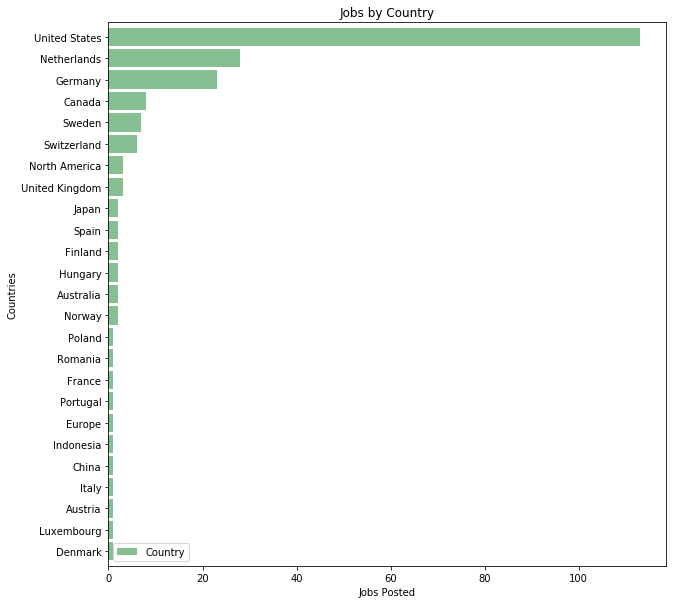

In [69]:
# Created horizontal bar graph for countries
country = mt_data2['Country'].value_counts()
country_df = pd.DataFrame(country)
country_df.plot(kind='barh', figsize=(10,10), color='#86bf91', zorder=2, width=0.85).invert_yaxis()
plt.xlabel("Jobs Posted")
plt.ylabel("Countries")
plt.title("Jobs by Country")
plt.savefig("../Project1/country_hbar.png")

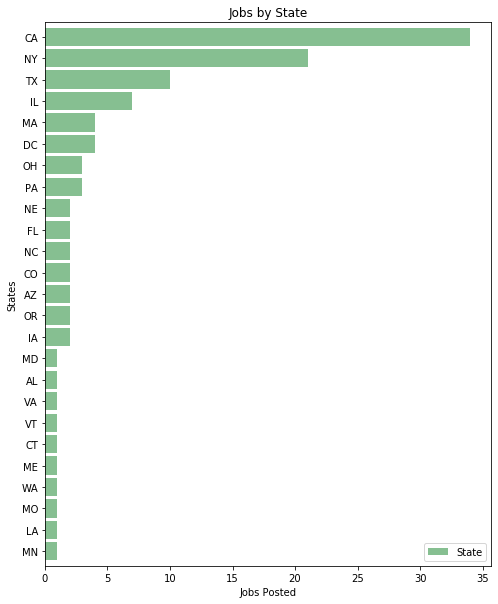

In [70]:
# Created horizontal bar graph for states
state = mt_data2['State'].value_counts()
state_df = pd.DataFrame(state)
state_df.plot(kind='barh', figsize=(8,10), color='#86bf91', zorder=2, width=0.85).invert_yaxis()
plt.xlabel("Jobs Posted")
plt.ylabel("States")
plt.title("Jobs by State")
plt.savefig("../Project1/state_hbar.png")

In [71]:
# Analysis on age of job posts

mt_data2['Today'] = '10/22/19'
mt_data2.rename(columns={'created_at':'Entered'}, inplace=True)
time_df = pd.DataFrame(mt_data2, columns=['Entered', 'Today'])

time_df['Entered Month'] = time_df['Entered'].str[4:7]
time_df['Entered Day'] = time_df['Entered'].str[8:10]
time_df['Entered Year'] = time_df['Entered'].str[-2:]

time_df['Entered Month']=time_df['Entered Month'].replace({'Jan':'01','Feb':'02','Mar':'03','Apr':'04','May':'05','Jun':'06',
                                                          'Jul':'07','Aug':'08','Sep':'09','Oct':'10','Nov':'11','Dec':'12'})

time_df['Entered On'] = time_df.pop('Entered Month')+'/'+time_df.pop('Entered Day')+'/'+time_df.pop('Entered Year')

#time_df['Age'] = time_df['Today']-time_df['Entered On']
time_df['Entered On']=pd.to_datetime(time_df['Entered On'])
time_df['Today']=pd.to_datetime(time_df['Today'])
time_df['Age'] = (time_df['Today']-time_df['Entered On']).dt.days
min = time_df['Age'].min()
max = time_df['Age'].max()
median = time_df['Age'].median()
mode = time_df['Age'].mode()
mean = time_df['Age'].mean()

time_df.describe().round()

,Age
count,243.0
mean,165.0
std,165.0
min,1.0
25%,14.0
50%,28.0
75%,348.0
max,366.0
